In [1]:
import pandas as pd
import numpy as np
import arxiv
import spacy
import re
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_md")

In [2]:
result = arxiv.query("all",max_results=1000)

df = pd.DataFrame(result)

In [3]:
df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,pdf_url,published,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed
0,None,None,"{'term': 'math.NA', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/1210.7708v1,Alexei Shadrin,{'name': 'Alexei Shadrin'},[Alexei Shadrin],None,True,http://arxiv.org/abs/1210.7708v1,...,http://arxiv.org/pdf/1210.7708v1,2012-10-29T16:12:41Z,"(2012, 10, 29, 16, 12, 41, 0, 303, 0)",The Landau-Kolmogorov problem consists of find...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.NA', 'scheme': 'http://arxiv.o...",Landau--Kolmogorov inequality revisited,"{'type': 'text/plain', 'language': None, 'base...",2012-10-29T16:12:41Z,"(2012, 10, 29, 16, 12, 41, 0, 303, 0)"
1,None,"23 pages, 7 figures","{'term': 'cond-mat.mtrl-sci', 'scheme': 'http:...",http://arxiv.org/abs/1602.00450v1,M. Kawasaki,{'name': 'M. Kawasaki'},"[T. C. Fujita, M. Uchida, Y. Kozuka, W. Sano, ...",10.1103/PhysRevB.93.064419,True,http://arxiv.org/abs/1602.00450v1,...,http://arxiv.org/pdf/1602.00450v1,2016-02-01T09:53:30Z,"(2016, 2, 1, 9, 53, 30, 0, 32, 0)","Pyrochlore oxides possessing ""all-in-all-out"" ...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http...",All-in-all-out magnetic domain wall conduction...,"{'type': 'text/plain', 'language': None, 'base...",2016-02-01T09:53:30Z,"(2016, 2, 1, 9, 53, 30, 0, 32, 0)"
2,None,None,"{'term': 'cs.DC', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1612.01842v2,Zaid Hussain,{'name': 'Zaid Hussain'},[Zaid Hussain],None,True,http://arxiv.org/abs/1612.01842v2,...,http://arxiv.org/pdf/1612.01842v2,2016-12-06T15:01:47Z,"(2016, 12, 6, 15, 1, 47, 1, 341, 0)","Recently, a higher dimensional Eisenstein-Jaco...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.DC', 'scheme': 'http://arxiv.org...",An Improved One-to-All Broadcasting in Higher ...,"{'type': 'text/plain', 'language': None, 'base...",2016-12-07T06:10:53Z,"(2016, 12, 7, 6, 10, 53, 2, 342, 0)"
3,None,"33 pages, 18 figures","{'term': 'math.CO', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/0705.3599v1,Chris Smyth,{'name': 'Chris Smyth'},"[James McKee, Chris Smyth]",None,True,http://arxiv.org/abs/0705.3599v1,...,http://arxiv.org/pdf/0705.3599v1,2007-05-24T15:45:39Z,"(2007, 5, 24, 15, 45, 39, 3, 144, 0)",We completely describe all integer symmetric m...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.CO', 'scheme': 'http://arxiv.o...",Integer symmetric matrices having all their ei...,"{'type': 'text/plain', 'language': None, 'base...",2007-05-24T15:45:39Z,"(2007, 5, 24, 15, 45, 39, 3, 144, 0)"
4,None,"10 pages, Journal ""Algebra and Discrete Mathem...","{'term': 'math.RA', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/0811.3325v1,Slavcho Shtrakov,{'name': 'Slavcho Shtrakov'},"[Jorg Koppitz, Slavcho Shtrakov]",None,True,http://arxiv.org/abs/0811.3325v1,...,http://arxiv.org/pdf/0811.3325v1,2008-11-20T12:28:46Z,"(2008, 11, 20, 12, 28, 46, 3, 325, 0)",The extensions of hypersubstitutions are mappi...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.RA', 'scheme': 'http://arxiv.o...",On mappings of terms determined by hypersubsti...,"{'type': 'text/plain', 'language': None, 'base...",2008-11-20T12:28:46Z,"(2008, 11, 20, 12, 28, 46, 3, 325, 0)"


In [4]:
df.columns

Index(['affiliation', 'arxiv_comment', 'arxiv_primary_category', 'arxiv_url',
       'author', 'author_detail', 'authors', 'doi', 'guidislink', 'id',
       'journal_reference', 'links', 'pdf_url', 'published',
       'published_parsed', 'summary', 'summary_detail', 'tags', 'title',
       'title_detail', 'updated', 'updated_parsed'],
      dtype='object')

In [5]:
df['text'] = df['summary'] + " " + df['title']
df = df.drop(columns=['affiliation','arxiv_comment','arxiv_url',
                     'author_detail','doi','guidislink','id',
                     'pdf_url','links','published','summary_detail',
                     'title_detail','updated','updated_parsed',
                     'journal_reference','tags','author','authors',
                     'published_parsed','summary','title'])

In [6]:
df.head()

,arxiv_primary_category,text
0,"{'term': 'math.NA', 'scheme': 'http://arxiv.or...",The Landau-Kolmogorov problem consists of find...
1,"{'term': 'cond-mat.mtrl-sci', 'scheme': 'http:...","Pyrochlore oxides possessing ""all-in-all-out"" ..."
2,"{'term': 'cs.DC', 'scheme': 'http://arxiv.org/...","Recently, a higher dimensional Eisenstein-Jaco..."
3,"{'term': 'math.CO', 'scheme': 'http://arxiv.or...",We completely describe all integer symmetric m...
4,"{'term': 'math.RA', 'scheme': 'http://arxiv.or...",The extensions of hypersubstitutions are mappi...


In [7]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df['text'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df['tokens'] = tokens
df['lemma'] = lemma
df['pos'] = pos

In [8]:
df['text_parsed'] = df['text'].apply(lambda x: nlp(x).vector)

In [9]:
df['text_parsed'].iloc[0]

array([-0.10698935,  0.17042151, -0.07473025, -0.06716613,  0.10614207,
        0.02206932, -0.02164571, -0.08012603,  0.06981217,  1.4196067 ,
       -0.1198304 ,  0.15476432,  0.05591436, -0.03641077, -0.08494858,
       -0.04361354, -0.10369464,  1.1451061 , -0.17271893, -0.11683376,
       -0.08977029,  0.07938512, -0.10332797,  0.04903564,  0.04818072,
       -0.04811901, -0.03146712, -0.0076994 ,  0.09269732,  0.05608609,
       -0.01189843,  0.07795323,  0.05910968,  0.04488805,  0.1220812 ,
       -0.07010029, -0.01259106, -0.00358807,  0.02935204,  0.06479456,
        0.02406941,  0.07225597,  0.10178884, -0.07257931, -0.03816656,
        0.02377509, -0.07870699,  0.08455178,  0.03126218,  0.01311468,
       -0.04954324,  0.05951928, -0.03815304,  0.08417661,  0.03089996,
       -0.01446717, -0.01752842,  0.01283254, -0.00464072, -0.02893031,
       -0.02480836, -0.03641409, -0.11154779,  0.09843634,  0.06986786,
       -0.06187356,  0.06513597,  0.08443032, -0.03595026, -0.00

In [10]:
df.isnull().sum()

arxiv_primary_category    0
text                      0
tokens                    0
lemma                     0
pos                       0
text_parsed               0
dtype: int64

In [11]:
df.dtypes

arxiv_primary_category    object
text                      object
tokens                    object
lemma                     object
pos                       object
text_parsed               object
dtype: object

In [12]:
df['arxiv_primary_category'] = df['arxiv_primary_category'].astype(str).str.replace('{\'term\': \'','').str.replace(r'\.(.*)','').str.replace(r'\',(.*)','')

In [13]:
df['arxiv_primary_category'].unique()

array(['math', 'cond-mat', 'cs', 'astro-ph', 'hep-th', 'physics',
       'quant-ph', 'dg-ga', 'hep-ph', 'hep-lat', 'math-ph', 'stat',
       'q-bio', 'q-alg', 'gr-qc', 'alg-geom', 'q-fin', 'hep-ex', 'nlin',
       'nucl-th', 'econ'], dtype=object)

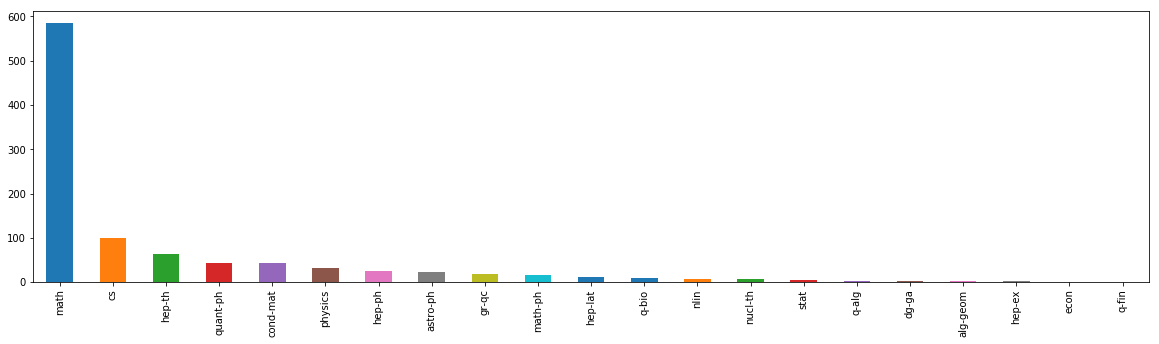

In [14]:
plt.figure(figsize=(20,5))
ax = df['arxiv_primary_category'].value_counts().plot(kind='bar',rot=90)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
X = df['text_parsed']
y = df.arxiv_primary_category

In [17]:
X_arrays = np.vstack(X.values)

In [18]:
X_arrays.shape

(1000, 300)

In [19]:
X_arrays

array([[-0.10698935,  0.17042151, -0.07473025, ..., -0.09160763,
        -0.00241858, -0.00308014],
       [-0.02771933,  0.16485323, -0.11763255, ..., -0.05956215,
         0.0720447 ,  0.09282862],
       [-0.0565428 ,  0.20918235, -0.11143299, ..., -0.10262482,
         0.03977027,  0.12460569],
       ...,
       [-0.0363357 ,  0.12468939, -0.12596431, ..., -0.01007143,
         0.04026951,  0.07172821],
       [-0.08171093,  0.14936097, -0.12105084, ..., -0.07019212,
         0.03891341, -0.00416047],
       [-0.03958456,  0.1404825 , -0.17580843, ..., -0.12400756,
         0.01791524,  0.10790659]], dtype=float32)

In [20]:
X.shape

(1000,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_arrays, y, test_size=0.33, random_state=111)

In [22]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(100)
svd.fit(X_train)

print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

[0.07833233 0.17549376 0.08602504 0.0508531  0.03758397 0.03553861
 0.02812348 0.02541145 0.02381307 0.02294089 0.01766381 0.01437329
 0.01396194 0.01290417 0.01230647 0.01075666 0.01068212 0.00994415
 0.00991805 0.00851852 0.00842103 0.007643   0.00758041 0.00706582
 0.00701576 0.00663182 0.006391   0.00610829 0.00594216 0.00569738
 0.00558126 0.00532045 0.00491899 0.00489725 0.00462219 0.00452182
 0.00434851 0.0042625  0.00420266 0.0040159  0.00399171 0.00373575
 0.00369984 0.00365746 0.00350152 0.00341731 0.00329524 0.00320403
 0.00316283 0.00314021 0.00301677 0.00294953 0.00283977 0.00280993
 0.00276118 0.00267051 0.00258249 0.00251537 0.00246819 0.00245053
 0.00238873 0.00235474 0.00223    0.0021993  0.00216652 0.00213323
 0.00209469 0.00206333 0.00203714 0.00195106 0.00192412 0.00189895
 0.00187823 0.0018196  0.00179965 0.00177991 0.00176533 0.00170056
 0.00163562 0.00162605 0.00158729 0.00157011 0.00152224 0.00150824
 0.00149476 0.00147359 0.00142902 0.0013893  0.00137788 0.0013

In [23]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

C:\Users\Jillian\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
print('Training set score:', svc.score(X_train, y_train))
print('\nTest set score:', svc.score(X_test, y_test))

Training set score: 0.5611940298507463

Test set score: 0.6303030303030303


In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.744776119402985

Test set score: 0.6636363636363637


In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Jillian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jillian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

Training set score: 0.6895522388059702

Test set score: 0.7090909090909091


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [30]:
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.703030303030303
